In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
import pathlib # manipulate paths
import glob 
# import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
#Word Cloud
from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from textblob import TextBlob

     |████████████████████████████████| 565 kB 4.2 MB/s 


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [1]:
# Now upload the file "kaggle.json" file
from google.colab import files
files.upload()

Saving Wish_overview - Sheet2.csv to Wish_overview - Sheet2.csv


{'Wish_overview - Sheet2.csv': b'title,title_orig,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,rating,rating_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,origin_country,merchant_title,merchant_name,merchant_positive_percent,merchant_rating_count,merchant_rating,merchant_id,product_url,product_picture,product_id\r\nSimple Summer Beach Vacation Multicouche 925 Sterling Silver Love Heart Anklet Women Foot Jewelry Party Gift,Simple Summer Beach Vacation Multilayer 925 Sterling Silver Love Heart Anklet Women Foot Jewelry Party Gift,3.11,4,3.77,5000,4.020408163,539,white,others,50,Livraison standard,1,FALSE,50,CN,Angol,angol,94,74181,4.476591041,322,https://www.wish.com/c/5d25b24efc082072e2af3471,https://canary.contestimg.wish.com/api/webimage/5d25b24efc082072e2af3471-medium.jpg,211\r\nBendis Women\'s Pattaya Lovely Long Summer Dress H291,Bendis

In [45]:
# Load Dataset
df = pd.read_csv("/content/Wish_overview - Sheet2.csv")

In [8]:
df.head()

,title,title_orig,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,rating,rating_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,origin_country,merchant_title,merchant_name,merchant_positive_percent,merchant_rating_count,merchant_rating,merchant_id,product_url,product_picture,product_id
0,Simple Summer Beach Vacation Multicouche 925 S...,Simple Summer Beach Vacation Multilayer 925 St...,3.11,4,3.77,5000,4.020408,539,white,others,50,Livraison standard,1.0,False,50,CN,Angol,angol,94.0,74181,4.476591,322,https://www.wish.com/c/5d25b24efc082072e2af3471,https://canary.contestimg.wish.com/api/webimag...,211
1,Bendis Women's Pattaya Lovely Long Summer Dres...,Bendis Women's Pattaya Lovely Long Summer Dres...,42.00,42,50.00,0,5.000000,0,red,others,2,Livraison standard,17.0,False,2,KR,atcmart,atcmart,67.0,6,3.833333,559,https://www.wish.com/c/5ff3dde8c34b780048c7b0b9,https://canary.contestimg.wish.com/api/webimag...,612
2,2021 nouveau été hommes polos chemise été mode...,2021 New Summer Men's Polos Shirt Summer Fashi...,4.79,44,5.81,1000,3.571429,42,dual,extra_small_size,1,Livraison standard,1.0,False,50,US,DDFGb,ddfgb,NaN,157,4.006369,508,https://www.wish.com/c/600687ecc9d71b0318749e95,https://canary.contestimg.wish.com/api/webimag...,654
3,Gilet d'entraînement d'été en dentelle sans ma...,5 Colors Fashion Women Sleeveless Lace Tops Se...,5.00,5,6.00,10000,3.906273,1355,grey,s,50,Livraison standard,2.0,False,50,CN,Adrea boutique,adreaboutique,NaN,15616,4.063140,70,https://www.wish.com/c/5bebc4a90269f2172b1af950,https://canary.contestimg.wish.com/api/webimag...,88
4,XS-8XL Plus La Taille Vêtements De Mode Robes ...,XS-8XL Plus Size Fashion Clothes Women's Dress...,4.69,5,5.68,1000,3.505495,273,yellow,xs,3,Livraison standard,1.0,False,50,CN,mynewsoul,mynewsoul,85.0,2034,4.002950,166,https://www.wish.com/c/5e0450861f26761e566fee35,https://canary.contestimg.wish.com/api/webimag...,276


In [9]:
df.describe()

,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,rating,rating_count,product_variation_inventory,shipping_option_price,inventory_total,merchant_positive_percent,merchant_rating_count,merchant_rating,merchant_id,product_id
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,715.000000,900.000000,900.000000,900.000000,900.000000
mean,12.442911,19.257778,14.599067,2561.336667,4.173822,484.621111,32.743333,4.169444,47.820000,82.295105,18423.573333,4.103478,326.970000,449.691111
std,12.260110,22.087454,14.748501,7556.066321,0.650877,1466.485715,21.538534,3.553654,8.911182,17.789098,55935.168729,0.231634,177.640368,260.219981
min,1.390000,2.000000,1.680000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.910828,0.000000,0.000000
25%,5.000000,6.000000,6.000000,10.000000,3.736747,0.750000,5.000000,2.000000,50.000000,81.000000,1166.000000,3.938250,177.750000,224.750000
50%,8.000000,11.000000,9.000000,10.000000,4.098606,44.500000,50.000000,3.000000,50.000000,86.000000,4428.000000,4.070243,342.500000,449.500000
75%,15.000000,25.000000,17.990000,1000.000000,5.000000,307.250000,50.000000,6.000000,50.000000,89.000000,14199.000000,4.231467,494.250000,674.250000
max,203.000000,213.000000,245.000000,100000.000000,5.000000,19546.000000,50.000000,22.000000,50.000000,96.000000,852711.000000,5.000000,569.000000,900.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   title                                900 non-null    object 
 1   title_orig                           900 non-null    object 
 2   discount_price                       900 non-null    float64
 3   retail_price                         900 non-null    int64  
 4   discount_price_in_original_currency  900 non-null    float64
 5   nb_cart_orders_approx                900 non-null    int64  
 6   rating                               900 non-null    float64
 7   rating_count                         900 non-null    int64  
 8   product_color                        900 non-null    object 
 9   product_variation_size_id            900 non-null    object 
 10  product_variation_inventory          900 non-null    int64  
 11  shipping_option_name            

In [46]:
df['merchant_id'] = df['merchant_id'].astype(str)

In [47]:
df['product_id'] = df['product_id'].astype(str)

In [23]:
corr = df.corr()
corr

,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,rating,rating_count,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,merchant_positive_percent,merchant_rating_count,merchant_rating
discount_price,1.000000,0.492529,0.999675,-0.139989,0.456439,-0.128754,0.104263,0.676574,0.182906,-0.370209,-0.171095,-0.112994,0.254783
retail_price,0.492529,1.000000,0.491733,-0.039590,0.157864,-0.060190,0.037438,0.300631,-0.001002,-0.143712,-0.097813,-0.048877,0.052309
discount_price_in_original_currency,0.999675,0.491733,1.000000,-0.140993,0.457532,-0.130709,0.100152,0.675310,0.182429,-0.370138,-0.174839,-0.113597,0.255455
nb_cart_orders_approx,-0.139989,-0.039590,-0.140993,1.000000,-0.185757,0.918133,0.044677,-0.116408,-0.003586,0.082044,0.078369,0.213783,-0.038826
rating,0.456439,0.157864,0.457532,-0.185757,1.000000,-0.170705,0.082106,0.473061,0.158999,-0.283101,-0.150891,-0.095600,0.288589
rating_count,-0.128754,-0.060190,-0.130709,0.918133,-0.170705,1.000000,0.054041,-0.114328,-0.013415,0.080276,0.083128,0.221772,-0.017403
product_variation_inventory,0.104263,0.037438,0.100152,0.044677,0.082106,0.054041,1.000000,0.129188,-0.006105,0.314424,-0.046951,0.102906,0.038966
shipping_option_price,0.676574,0.300631,0.675310,-0.116408,0.473061,-0.114328,0.129188,1.000000,0.378130,-0.410352,-0.106507,-0.020680,0.248581
shipping_is_express,0.182906,-0.001002,0.182429,-0.003586,0.158999,-0.013415,-0.006105,0.378130,1.000000,-0.336442,0.190982,0.168086,0.313101
inventory_total,-0.370209,-0.143712,-0.370138,0.082044,-0.283101,0.080276,0.314424,-0.410352,-0.336442,1.000000,0.030405,0.053247,-0.316621


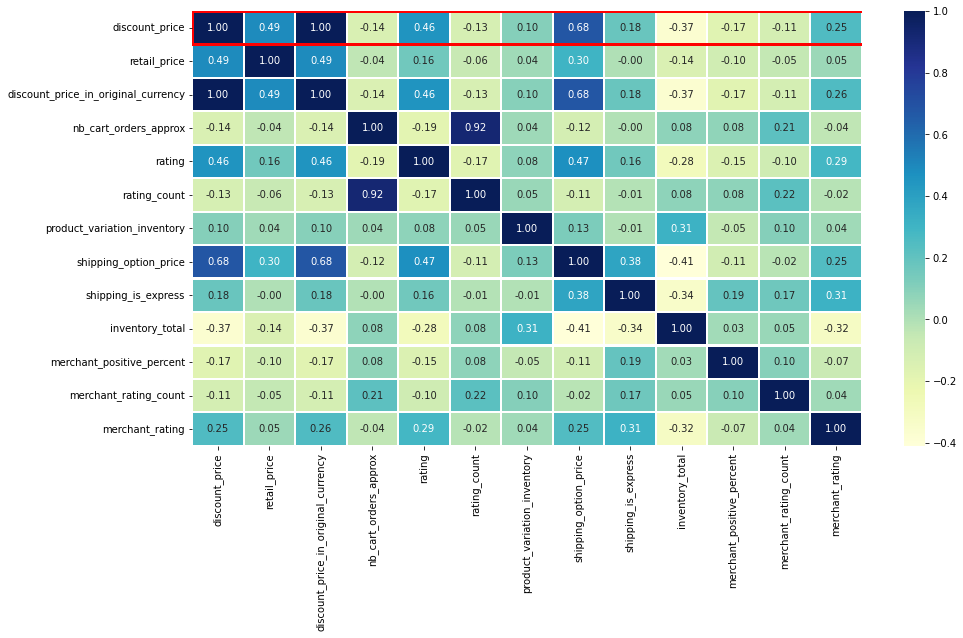

In [24]:
fig,ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=1.2,
                 fmt=".2f",
                 cmap="YlGnBu");
ax.add_patch(plt.Rectangle((0,0),31,1, 
                           fill = False, 
                           edgecolor = 'red', 
                           lw = 3))

In [ ]:
numerical_col = list(df.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical_col}")

In [25]:
corr.discount_price.sort_values(ascending=False)

discount_price                         1.000000
discount_price_in_original_currency    0.999675
shipping_option_price                  0.676574
retail_price                           0.492529
rating                                 0.456439
merchant_rating                        0.254783
shipping_is_express                    0.182906
product_variation_inventory            0.104263
merchant_rating_count                 -0.112994
rating_count                          -0.128754
nb_cart_orders_approx                 -0.139989
merchant_positive_percent             -0.171095
inventory_total                       -0.370209
Name: discount_price, dtype: float64

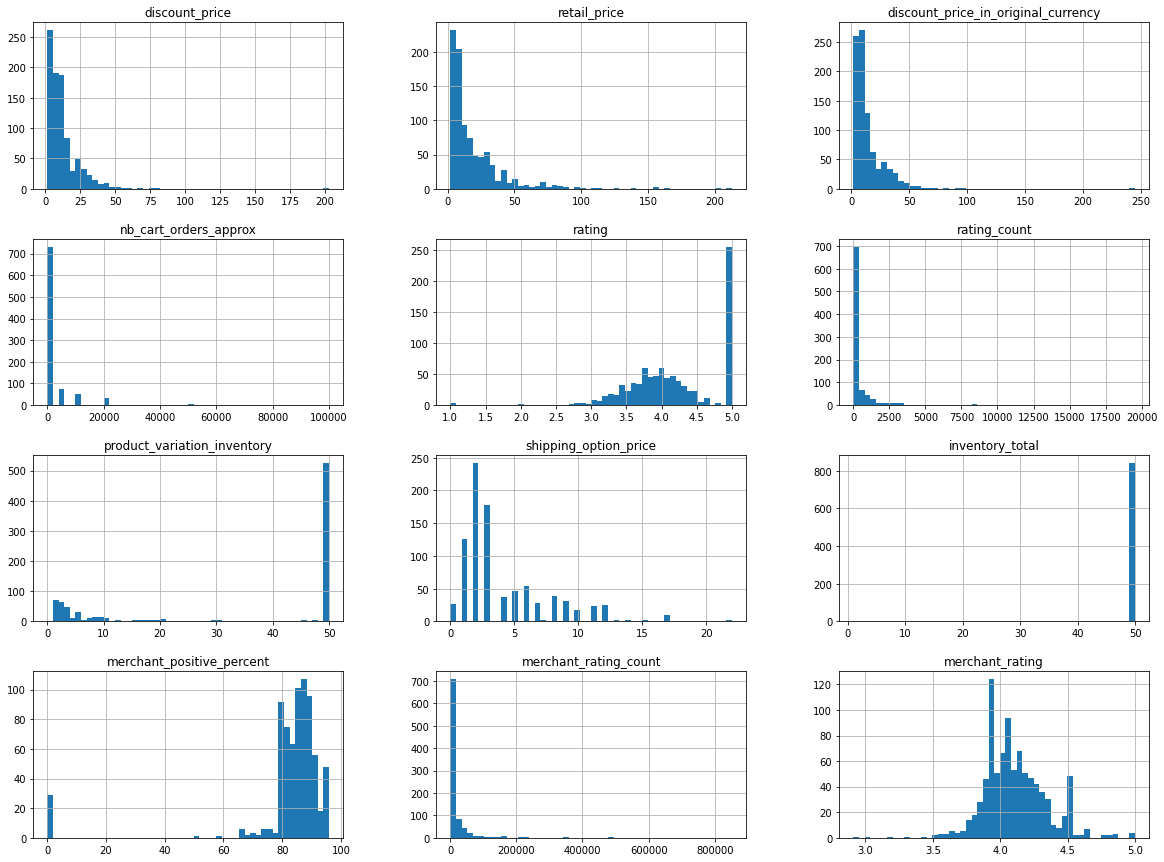

In [27]:
df[numerical_col].hist(bins=50, figsize=(20,15))
plt.show()

# Price

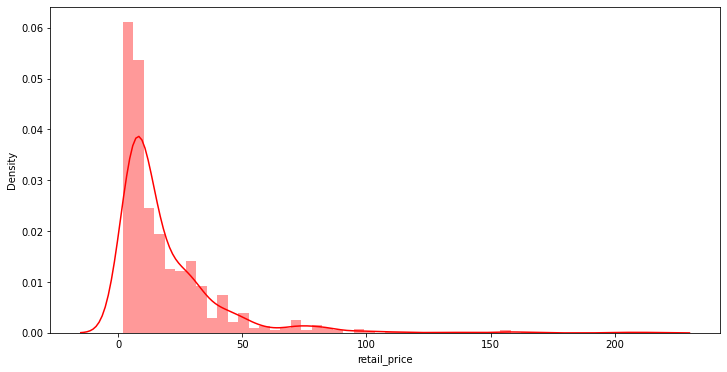

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(df['retail_price'], color='red', label='Price')

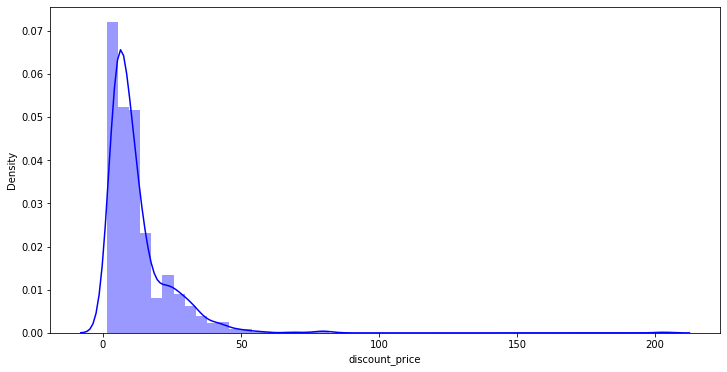

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(df['discount_price'], color='blue', label='Discount price')

In [38]:
trace1 = go.Violin(y=df["discount_price"],name='discount_price')
trace2 = go.Violin(y=df["retail_price"],name='Retail price')
fig=go.Figure([trace1, trace2])
fig.update_layout(
title='Comparison between discount_price and retail price',
yaxis_title='Price(EUR)')
fig.show()

In [43]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['retail_price'], name='Retail Price'))
fig.add_trace((go.Box(x=df['discount_price'], name='discount_price')))
fig['layout']['title'] = 'Distribution of discount_price and Retail Price'
fig.show()

In [51]:
#extracting gender information through product title

df['title_orig'] = df['title_orig'].apply(lambda x: x.title())

women_err = []

def prod_gen(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            women_err.append(i)
    if tipe in women_err:
        return 'Man'
    else:
        return 'Woman'
        
df.insert(1, 'prod_gen', df['title_orig'].apply(prod_gen))

df['prod_gen'].value_counts()

Woman    814
Man       86
Name: prod_gen, dtype: int64

In [52]:
fig = go.Figure()
fig.add_trace((go.Box(x=df[df['prod_gen']=='Man']['discount_price'], name='Man discount Price')))
fig.add_trace(go.Box(x=df[df['prod_gen']=='Woman']['discount_price'], name='Woman discount Price'))

fig['layout']['title'] = 'Distribution of discount_price in Genders'
fig.show()

In [53]:
fig = go.Figure()
fig.add_trace((go.Box(x=df[df['prod_gen']=='Man']['retail_price'], name='Man retail Price')))
fig.add_trace(go.Box(x=df[df['prod_gen']=='Woman']['retail_price'], name='Woman retail Price'))

fig['layout']['title'] = 'Distribution of retail_price in Genders'
fig.show()

In [54]:
px.scatter(df, x='nb_cart_orders_approx', y='discount_price',marginal_x='box', title='Discount Price vs Units Sold')

In [55]:
px.scatter(df, x='nb_cart_orders_approx', y='retail_price',marginal_x='box', title='Discount Price vs Units Sold')

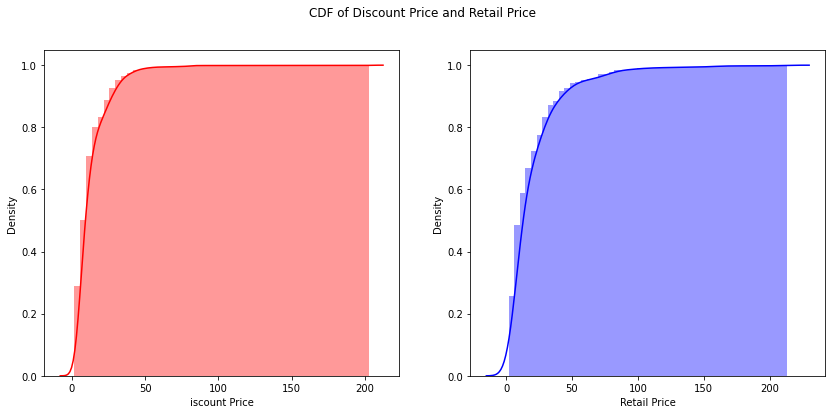

In [57]:
kwargs = {'cumulative':True}
f, axes = plt.subplots(1,2, figsize=(14,6))
f.suptitle('CDF of Discount Price and Retail Price')
sns.distplot(df['discount_price'].values,kde_kws=kwargs, hist_kws=kwargs, color='red', label='discount_price', ax=axes[0]);
sns.distplot(df['retail_price'].values,kde_kws=kwargs, hist_kws=kwargs, color='blue', label='Retail Price', ax=axes[1]);
axes[0].set(xlabel='Discount Price');
axes[1].set(xlabel='Retail Price');

CDFs are more useful inorder to visualize the data more efficiently.

CDF of retail price reveals that 97% of products are listed for less than aproximate price 70-80
CDF of Price closely represents the CDF curve of Normal distribution which can be summarized efficiently except for the 3% data
Incase of Retail price the distribution is not very much smooth and contains price gaps

In [58]:
fig = px.scatter(df, x='retail_price', y='rating')
fig.update_layout(title_text="Relationship between retail_price and rating")
fig.show()

In [103]:
df['nb_cart_orders_approx'].unique()

array([  5000,      0,   1000,  10000,  20000,     10,      7,      5,
            3,      1,      9,      6,  50000,      4,      8,      2,
       100000])

In [104]:
df['nb_cart_orders_approx'] = df['nb_cart_orders_approx'].apply(lambda x: 100 if (x <= 100) else x)

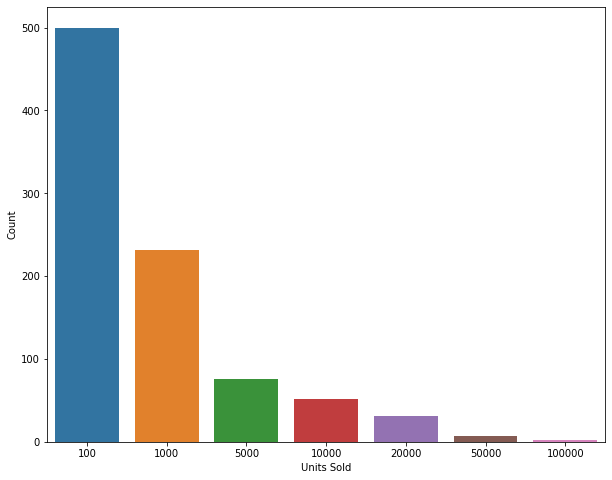

In [105]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('nb_cart_orders_approx',
              data = df,
              order = df['nb_cart_orders_approx'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()

Prodcut with highest sales irrespective of price: 

title             Sport Style Femmes À Capuche Robe Courte Chic ...
prod_gen                                                      Woman
title_orig        Sports Style Women Hoodied Short Dress Chic Le...
discount_price                                                    7
retail_price                                                      7
Name: 610, dtype: object




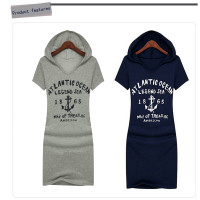

In [106]:
#MOST SOLD PRODUCTS - Top 3
most_sold_product = df['nb_cart_orders_approx'].idxmax()
print("Prodcut with highest sales irrespective of price: \n")
print(df.iloc[most_sold_product].head())
print('\n')
response1 = requests.get(df[df['nb_cart_orders_approx'] == 100000].product_picture.tolist()[0]) 

#printing the thumbnail of that prodcuts
Image.open(BytesIO(response1.content))

title             Mini-robe en mousseline de soie sexy pour femm...
prod_gen                                                      Woman
title_orig        Women'S Sexy Chiffon Mini Dress Summer Halter ...
discount_price                                                   10
retail_price                                                     10
Name: 18, dtype: object




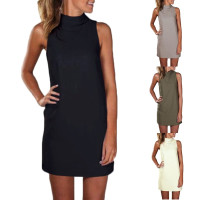

In [110]:
#most_sold_product = df['units_sold'].idxmax()
#print("Prodcut with highest sales irrespective of price: \n")
print(df.iloc[18].head())
print('\n')
response2 = requests.get(df[df['nb_cart_orders_approx'] == 100000].product_picture.tolist()[1]) 
Image.open(BytesIO(response2.content))

In [117]:
# Gender Collection (Male and Female)
Total_male = round(df.title_orig.str.count("Men").sum()/len(df)*100, 3)
Total_female = round(df.title_orig.str.count("Women").sum()/len(df)*100, 3) 

fig = go.Figure()
fig.add_trace(go.Indicator(mode = "number+delta",
                             value = Total_male,
                             title = {"text": "Men Collection in %",
                                      "font" : {'color': 'rgb(58, 171, 163)', 'size': 25, 'family': 'Raleway'}},
                             number = {'font': {'color': 'rgb(58, 171, 163)', 'size': 25, 'family': 'Raleway'}},
                             domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(mode = "number+delta",
                             value = Total_female,
                             title = {"text": "Women Collection in %",
                                      "font" : {'color': 'rgb(0, 0, 0)', 'size': 35, 'family': 'Raleway'}},
                             number = {'font': {'color': 'rgb(0, 0, 0)', 'size': 35, 'family': 'Raleway'}},
                             domain = {'row': 0, 'column': 1}))
fig.update_layout(grid = {'rows': 1, 'columns': 2, 'pattern': 'independent'})
fig.show()

In [66]:
from nltk.stem import *
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
swords = stopwords.words('english')

def clean_text(s: str) -> str:
    """ Cleans the strings from the titles and the tags"""
    
    # Only Keep letters
    processed_s = re.sub(r"[^a-z]", " ", s.lower())
    
    ps = PorterStemmer()
    
    # stemmed words with Porter Lemantizer
    stemmed_s = [ps.stem(s) for s in processed_s.split()]
    
    unique_tags = list(set(stemmed_s))
    
    # Filter stop words
    cleaned_text = [w for w in unique_tags if (w not in swords and len(w) > 2)]
    
    return cleaned_text

` = ( df["title"] + df["title_orig"]).values
processed_tags = [clean_text(s) for s in all_tags]

In [89]:
from collections import Counter

vocab = Counter()
for tweet in all_tags:
    for word in tweet.split(' '):
        vocab[word] += 1

vocab.most_common(40)[:20]

[('Summer', 1108),
 ('Dress', 577),
 ('Casual', 546),
 ('Fashion', 533),
 ('Women', 473),
 ('Plus', 421),
 ('Size', 411),
 ('Short', 396),
 ('Tops', 348),
 ('de', 333),
 ('manches', 289),
 ('Sleeve', 289),
 ('à', 278),
 ('Shorts', 273),
 ('Shirt', 261),
 ('Loose', 252),
 ('Sexy', 251),
 ('femmes', 250),
 ('Beach', 246),
 ('Sleeveless', 233)]

In [93]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
import nltk
from nltk import WordNetLemmatizer, pos_tag, word_tokenize
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [94]:
def unigram(data):
    text = " ".join(data)
    CleanedText = re.sub(r'[^a-zA-Z]'," ",text)
    CleanedText = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(CleanedText) if word not in stopwords.words("english") and len(word) > 3])
    return CleanedText

In [98]:
CleanedText = unigram(all_tags)

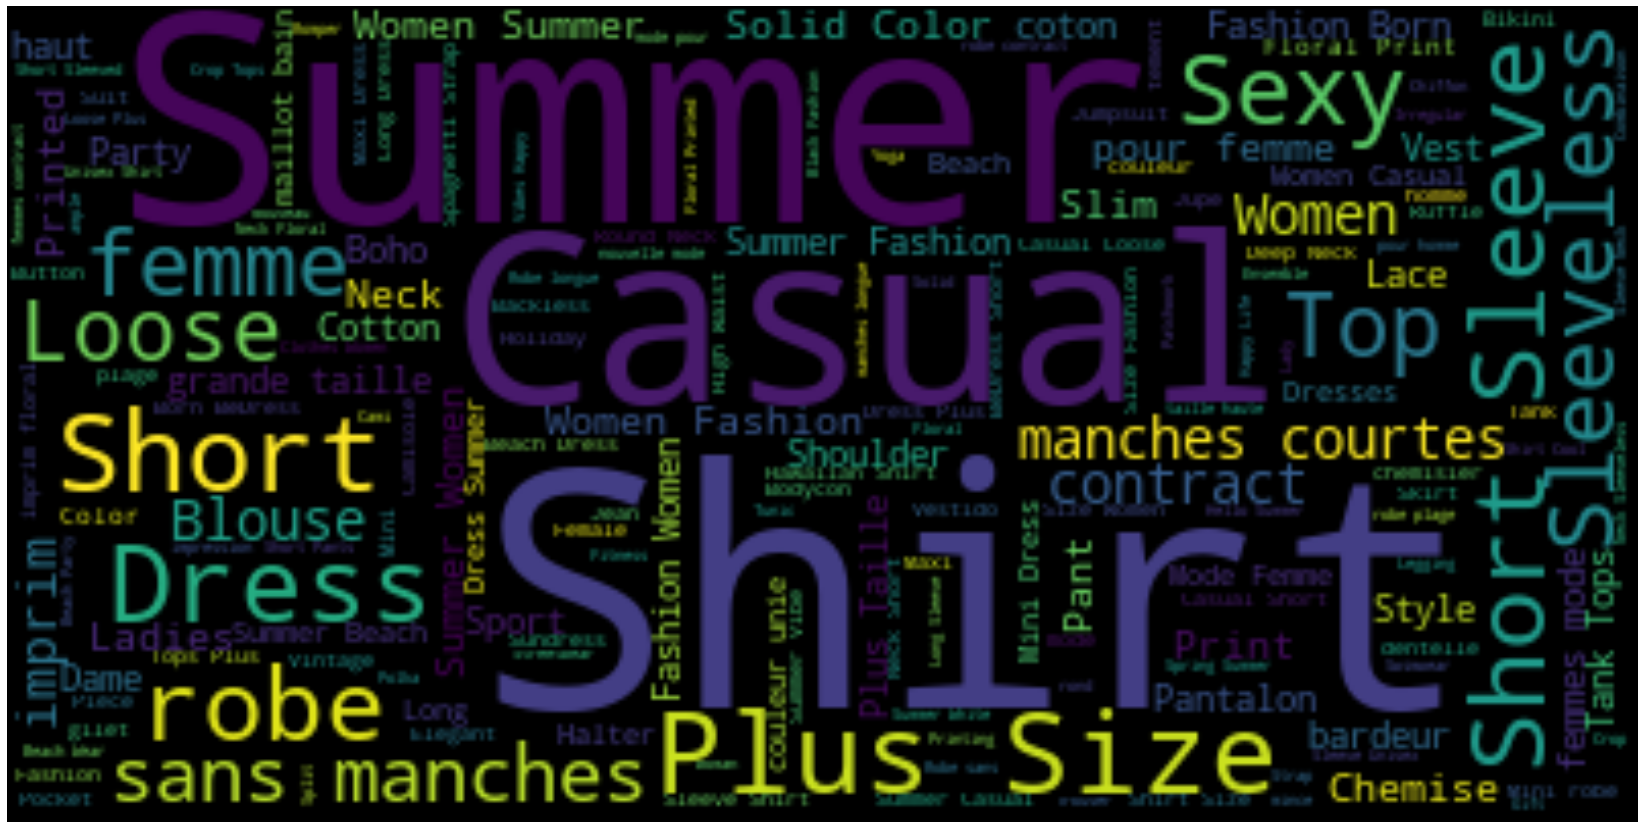

In [100]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
wordcloud = WordCloud(random_state=21).generate(CleanedText)
plt.figure(figsize = (30,15))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()